In [2]:
#In this notebook we reproduce Figure 3 from the main text 
#and the first figure from the supplemental information.

In [3]:
#Import relevant namespaces.

from __future__ import print_function
import numpy as np
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize

In [4]:
#Declare max sequence lengths
maxLengths_1024 = [0,1,2,4,8,16,32,64,128,256,512,1024]

In [6]:
#Load subsampled GST and RPE results files.
GSTResultsFile = open('GST-Subsampling-Results.pkl','r')
resultsGSTD = pickle.load(GSTResultsFile)
GSTResultsFile.close()

RPEResultsFile = open('RPE-Subsampling-Results.pkl','r')
resultsD = pickle.load(RPEResultsFile)
RPEResultsFile.close()

In [7]:
#Define auxiliary fit function.

def heisenberg_fit(x,a):
    return float(a) / x

0.00443055330317
0.00724701992637
0.00091916567665
0.00376142992186


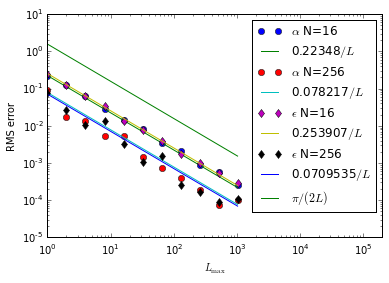

In [8]:
#Plot the composite of Figures 3 and S1.
RMSDataD = {}
for method in ['RPE']:
    for angle, angle_lbl, marker in [('alpha',r'$\alpha$','o'),('epsilon',r'$\epsilon$','d')]:
        for N in [16,256]:
            expKey = ('method',method,'N',N)
            RMSDataD[angle,N] = np.sqrt(np.mean(resultsD[(angle,)+expKey][:,:,0]**2,axis=1))
            fit_data = optimize.curve_fit(heisenberg_fit,maxLengths_1024[1:],RMSDataD[angle,N])
            fit_const = fit_data[0][0]
            fit_fit = np.sqrt(fit_data[1][0,0])
            print(fit_fit)
            plt.plot(maxLengths_1024[1:],RMSDataD[angle,N],marker,label=angle_lbl+' '+'N='+str(N))
            plt.plot(maxLengths_1024[1:],fit_const/np.array(maxLengths_1024[1:]),label='%g'%fit_const+r'$/L$')
plt.plot(maxLengths_1024[1:],np.pi/(2*np.array(maxLengths_1024[1:])),label=r'$\pi/(2L)$')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e0,2e5)
plt.xlabel(r'$L_{\max}$')
plt.ylabel('RMS error')
plt.legend()
#plt.savefig('RMS_error_scaling.pdf')
plt.show()

In [9]:
#Print data for Figure 3.
print("L_max\t alpha N=16\t\t alpha N=256")
for i in xrange(11):
    print(maxLengths_1024[i+1],'\t',RMSDataD['alpha',16][i],'\t',RMSDataD['alpha',256][i])

L_max	 alpha N=16		 alpha N=256
1 	 0.215599224273 	 0.0911792500665
2 	 0.12350177335 	 0.0172695377027
4 	 0.0635575060913 	 0.0136276956347
8 	 0.0280204128289 	 0.00544853156049
16 	 0.0143311703483 	 0.00523012910827
32 	 0.00836008590527 	 0.00144251783312
64 	 0.00336304843287 	 0.000726060876695
128 	 0.0020923670161 	 0.000390747512485
256 	 0.000881568411366 	 0.000184207797818
512 	 0.000558595698295 	 7.62664228188e-05
1024 	 0.000257028532063 	 0.000104106145407


In [10]:
#Print data for Supplemental Information Figure 1.
print("L_max\t epsilon N=16\t\t epsilon N=256")
for i in xrange(11):
    print(maxLengths_1024[i+1],'\t',RMSDataD['epsilon',16][i],'\t',RMSDataD['epsilon',256][i])

L_max	 epsilon N=16		 epsilon N=256
1 	 0.253618685703 	 0.0766573686875
2 	 0.128295155971 	 0.0267515048381
4 	 0.061871000736 	 0.0103914526686
8 	 0.0330666768265 	 0.0136676979442
16 	 0.0136522945144 	 0.00326491518384
32 	 0.007720718018 	 0.00108021982715
64 	 0.00394418786672 	 0.00156627445395
128 	 0.00171344405254 	 0.000252331885579
256 	 0.000979269466937 	 0.000166875184577
512 	 0.000548175270237 	 8.87730045416e-05
1024 	 0.000293763407584 	 0.000105900483105
